# Loading Data of Youtubers for Analysis

In [1]:
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv(r'C:\Users\Asad Ameen\Desktop\docxtpl\reports\Machine_Learning\youtubers_df.csv')

# Calculate summary statistics for numerical columns
summary_stats = df[['Subscribers', 'Visits', 'Likes', 'Comments']].describe()

# Print the summary statistics
print(summary_stats)

        Subscribers        Visits         Likes       Comments
count  1.000000e+03  1.000000e+03  1.000000e+03    1000.000000
mean   2.189440e+07  1.209446e+06  5.363259e+04    1288.768000
std    1.682775e+07  5.229942e+06  2.580457e+05    6778.188308
min    1.170000e+07  0.000000e+00  0.000000e+00       0.000000
25%    1.380000e+07  3.197500e+04  4.717500e+02       2.000000
50%    1.675000e+07  1.744500e+05  3.500000e+03      67.000000
75%    2.370000e+07  8.654750e+05  2.865000e+04     472.000000
max    2.495000e+08  1.174000e+08  5.300000e+06  154000.000000


# Data Cleaning

In [2]:
# Check for missing values in the entire DataFrame

missing_values = df.isnull()

# Check for missing values in a specific column (e.g., 'Categories')
missing_subscribers = df['Categories'].isna()

# Summarize missing values for the entire DataFrame
missing_summary = missing_values.sum()

# Summarize missing values for a specific column
missing_subscribers_summary = missing_subscribers.sum()

# Print the results
print("Missing Values in the Entire DataFrame:")
print(missing_summary)

print("\nMissing Values in 'Subscribers' Column:")
print(missing_subscribers_summary)

Missing Values in the Entire DataFrame:
Rank             0
Username         0
Categories     306
Subscribers      0
Country          0
Visits           0
Likes            0
Comments         0
Links            0
dtype: int64

Missing Values in 'Subscribers' Column:
306


In [3]:
# Replace missing categories with "Not Specified"
df['Categories'].fillna('Not Specified', inplace=True)

# Print the first few rows of the DataFrame to verify the changes
df.head(10)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Not Specified,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000,Estados Unidos,2400000.0,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000,Unknown,2600000.0,28000,0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000,Unknown,4100000.0,22100,0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000,India,74300.0,2600,32,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000,Estados Unidos,184500.0,6300,214,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


In [4]:
# Check for missing values in the entire DataFrame to verify

missing_values_1 = df.isnull().sum()

missing_values_1

Rank           0
Username       0
Categories     0
Subscribers    0
Country        0
Visits         0
Likes          0
Comments       0
Links          0
dtype: int64

In [5]:
# Check the data types of all columns
data_types = df.dtypes

# Print the data types
data_types

Rank             int64
Username        object
Categories      object
Subscribers      int64
Country         object
Visits         float64
Likes            int64
Comments         int64
Links           object
dtype: object

In [6]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Print the duplicate rows
print("Duplicate Rows:")
print(df[duplicate_rows])

Duplicate Rows:
Empty DataFrame
Columns: [Rank, Username, Categories, Subscribers, Country, Visits, Likes, Comments, Links]
Index: []


# Descriptive Statistics and Data Exploration

In [7]:
from scipy import stats

# Calculate the Z-scores for each numerical column
z_scores = stats.zscore(df[['Subscribers', 'Visits', 'Likes', 'Comments']])

# Define a threshold (e.g., 2 or 3)
threshold = 3

# Identify outliers using the Z-score method
outliers = (z_scores > threshold).any(axis=1)

# Print the rows containing outliers
print("Outliers based on Z-scores:")
df[outliers]

# Leaving the ouliers as it is for the time being

Outliers based on Z-scores:


,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Not Specified,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,6,PewDiePie,"Películas, Videojuegos",111500000,Estados Unidos,2400000.0,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,7,LikeNastyaofficial,Juguetes,107500000,Unknown,2600000.0,28000,0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...
7,8,VladandNiki,"Animación, Juguetes",101400000,Unknown,4100000.0,22100,0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...
8,9,zeemusiccompany,Música y baile,99700000,India,74300.0,2600,32,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...
9,10,WWE,Videojuegos,97200000,Estados Unidos,184500.0,6300,214,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...


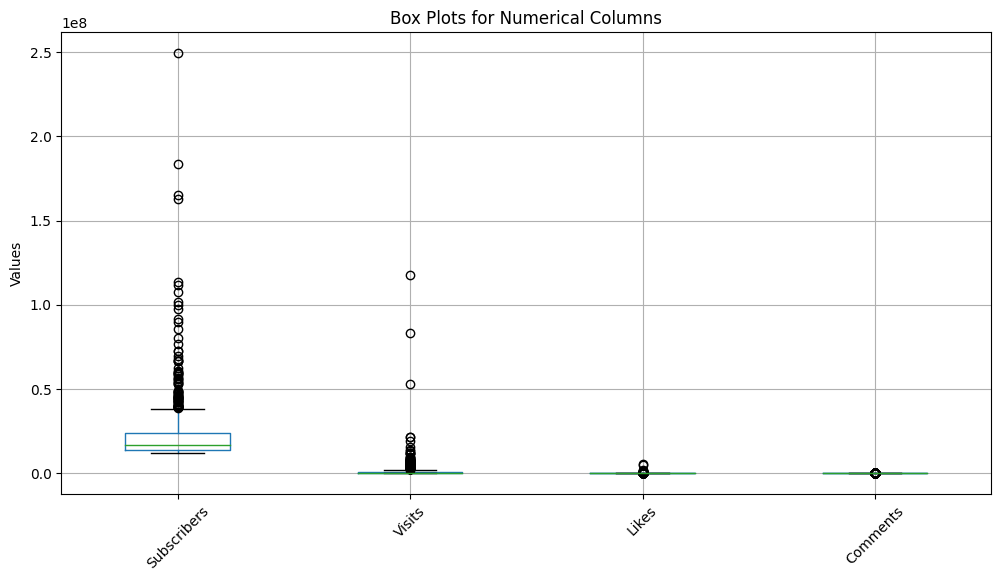

In [8]:
import matplotlib.pyplot as plt

# Create box plots for numerical columns
plt.figure(figsize=(12, 6))
df[['Subscribers', 'Visits', 'Likes', 'Comments']].boxplot()
plt.title('Box Plots for Numerical Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

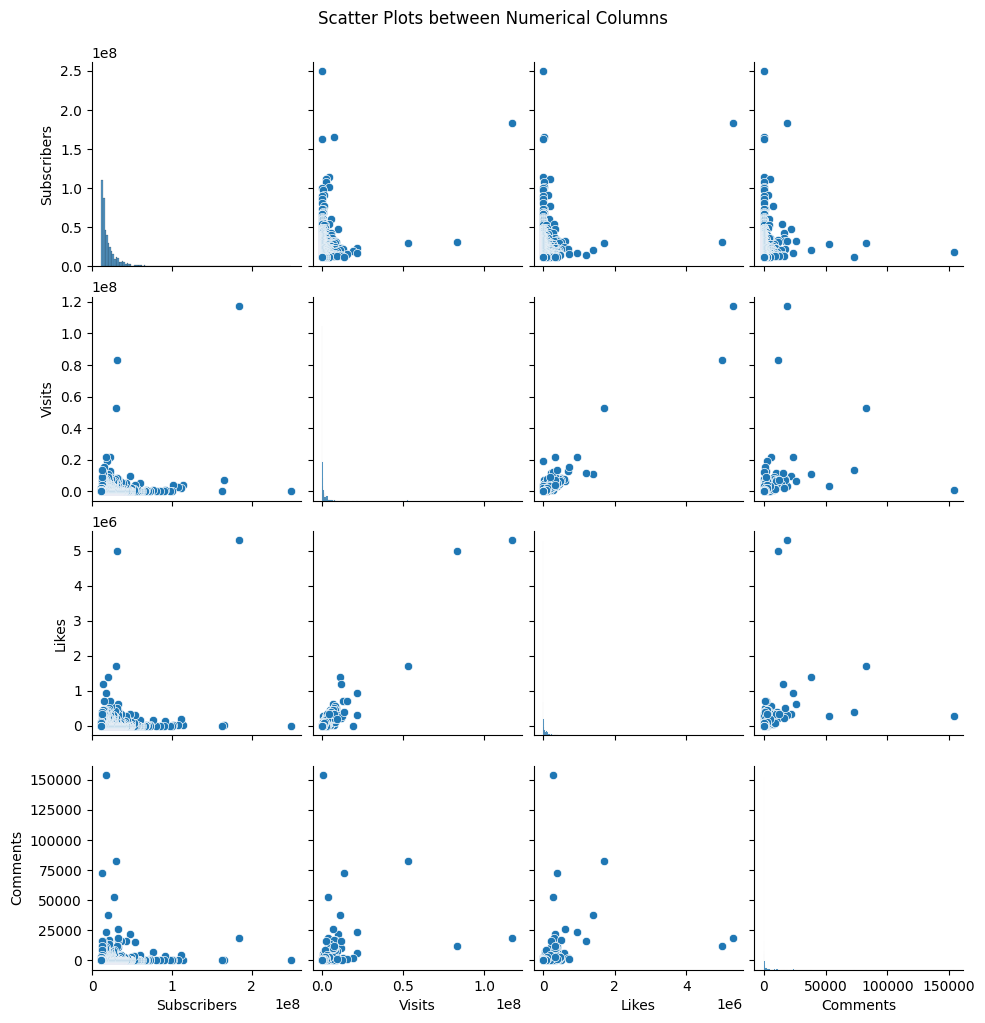

In [9]:
# Create scatter plots between pairs of numerical columns
import seaborn as sns

sns.pairplot(df[['Subscribers', 'Visits', 'Likes', 'Comments']])
plt.suptitle('Scatter Plots between Numerical Columns', y=1.02)
plt.show()

In [10]:
# Check for non-negative values in the 'Subscribers' column
negative_subscribers = df['Subscribers'] < 0

# Check for non-negative values in the 'Likes' column
negative_likes = df['Likes'] < 0

# Check for non-negative values in the 'Comments' column
negative_comments = df['Comments'] < 0

# Print the rows where values are negative for each column
print("Rows with negative Subscribers:")
print(df[negative_subscribers])

print("\nRows with negative Likes:")
print(df[negative_likes])

print("\nRows with negative Comments:")
print(df[negative_comments])

Rows with negative Subscribers:
Empty DataFrame
Columns: [Rank, Username, Categories, Subscribers, Country, Visits, Likes, Comments, Links]
Index: []

Rows with negative Likes:
Empty DataFrame
Columns: [Rank, Username, Categories, Subscribers, Country, Visits, Likes, Comments, Links]
Index: []

Rows with negative Comments:
Empty DataFrame
Columns: [Rank, Username, Categories, Subscribers, Country, Visits, Likes, Comments, Links]
Index: []


In [11]:
# Calculate the engagement rate and add it as a new column
df['EngagementRate'] = df['Likes'] / df['Subscribers']

# Print the DataFrame with the new 'EngagementRate' column
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,EngagementRate
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,0.000011
1,2,MrBeast,"Videojuegos, Humor",183500000,Estados Unidos,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,0.028883
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,0.000149
3,4,SETIndia,Not Specified,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,0.000001
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,0.000109


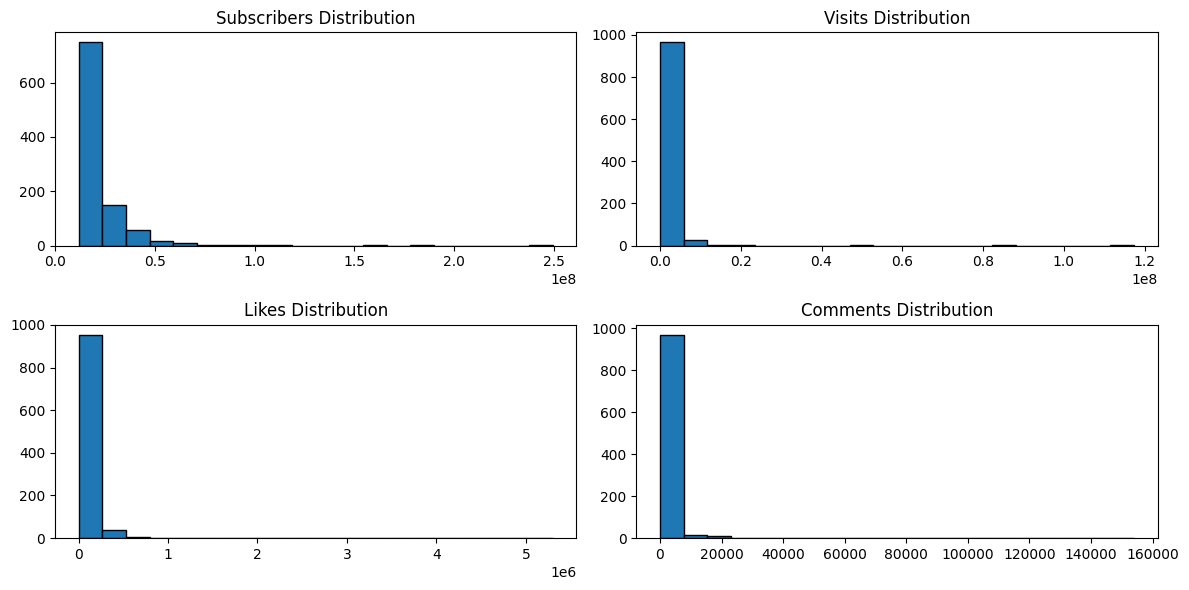

In [12]:
# Create histograms for numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.hist(df['Subscribers'], bins=20, edgecolor='k')
plt.title('Subscribers Distribution')
plt.subplot(222)
plt.hist(df['Visits'], bins=20, edgecolor='k')
plt.title('Visits Distribution')
plt.subplot(223)
plt.hist(df['Likes'], bins=20, edgecolor='k')
plt.title('Likes Distribution')
plt.subplot(224)
plt.hist(df['Comments'], bins=20, edgecolor='k')
plt.title('Comments Distribution')
plt.tight_layout()
plt.show()

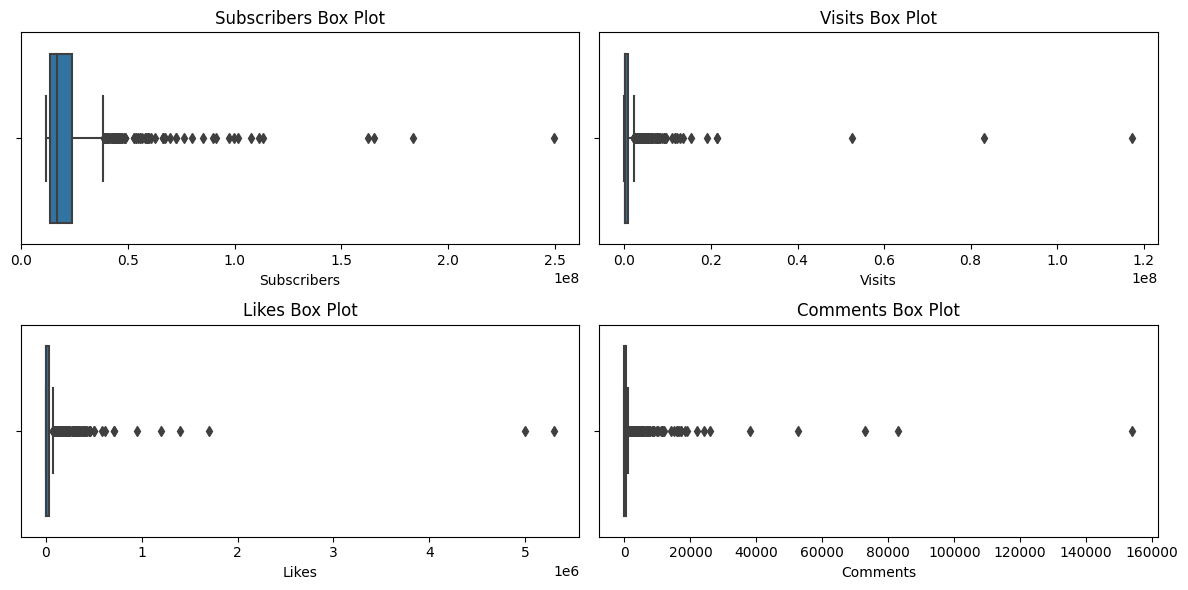

In [13]:
# Create box plots for numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(221)
sns.boxplot(x=df['Subscribers'])
plt.title('Subscribers Box Plot')
plt.subplot(222)
sns.boxplot(x=df['Visits'])
plt.title('Visits Box Plot')
plt.subplot(223)
sns.boxplot(x=df['Likes'])
plt.title('Likes Box Plot')
plt.subplot(224)
sns.boxplot(x=df['Comments'])
plt.title('Comments Box Plot')
plt.tight_layout()
plt.show()

In [14]:
df1 = df

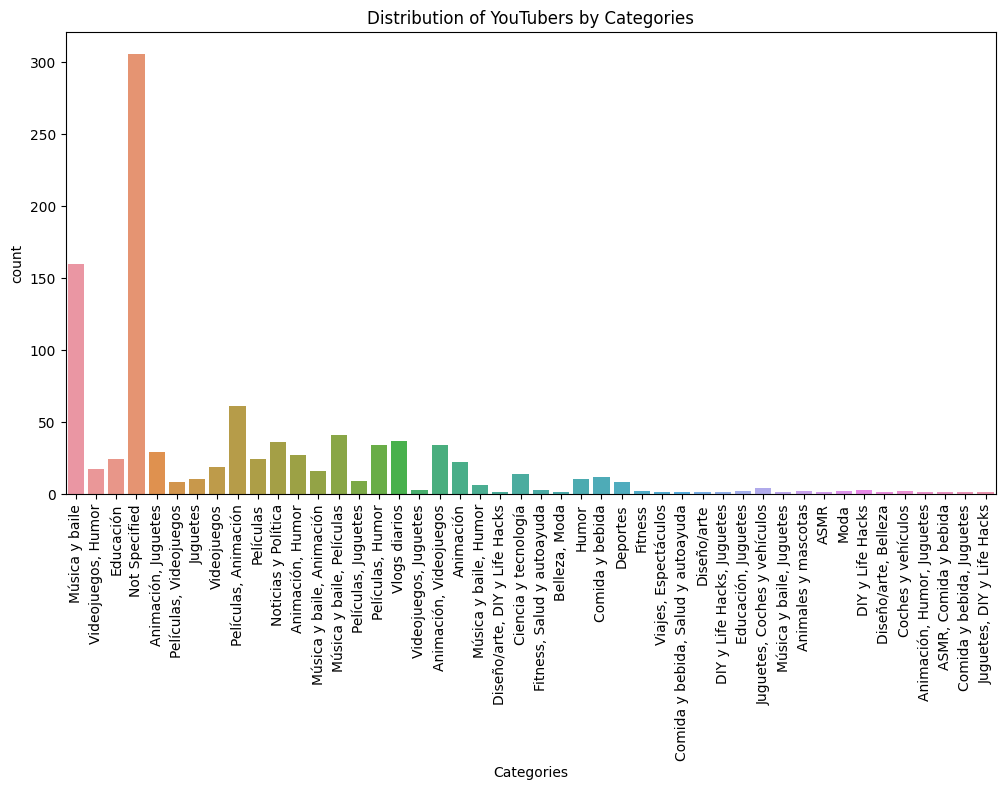

In [15]:
# Create a bar plot for the 'Categories' column
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Categories')
plt.xticks(rotation=90)
plt.title('Distribution of YouTubers by Categories')
plt.show()

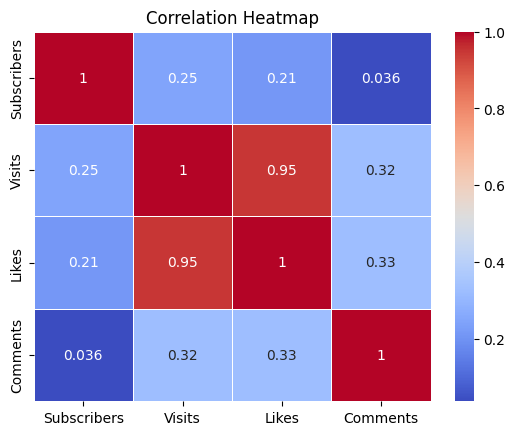

In [16]:
# Create a correlation heatmap
correlation_matrix = df[['Subscribers', 'Visits', 'Likes', 'Comments']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Category Analysis

In [17]:
# Group YouTubers by Categories
grouped = df.groupby('Categories')

In [18]:
# Calculate mean values for each category
mean_subscribers = grouped['Subscribers'].mean()
mean_likes = grouped['Likes'].mean()
mean_comments = grouped['Comments'].mean()
mean_visits = grouped['Visits'].mean()

In [19]:
# Calculate the number of YouTubers in each category
count_youtubers = grouped.size()

C:\Users\Asad Ameen\AppData\Local\Temp\ipykernel_13244\2082589228.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


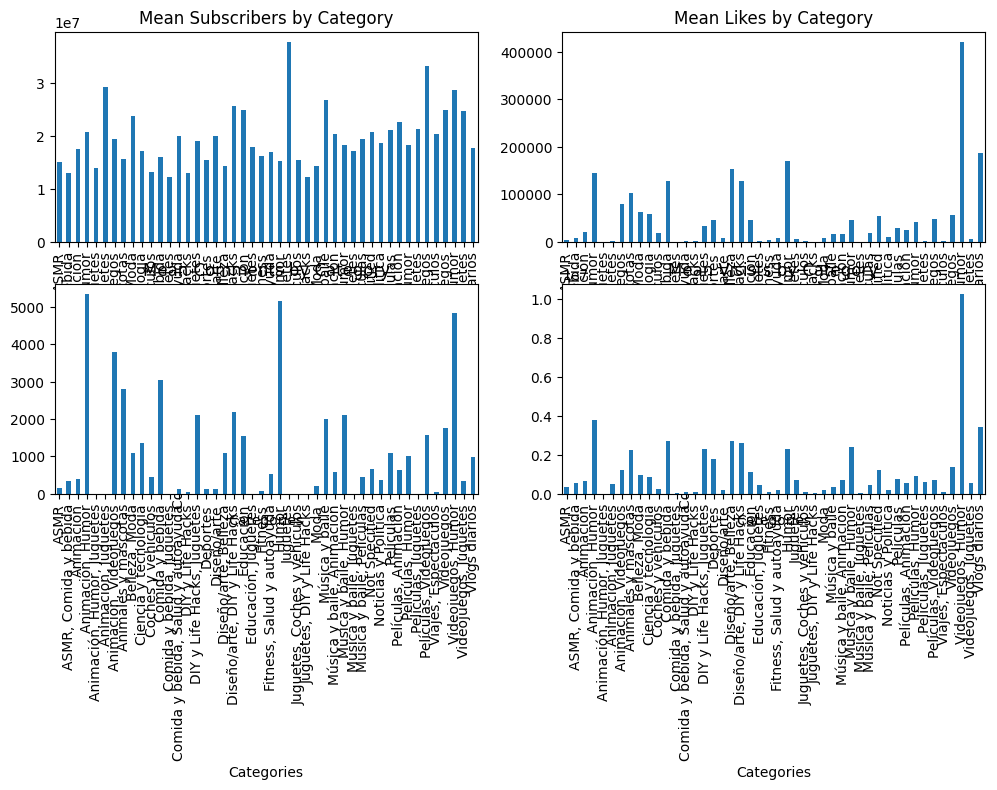

In [20]:
# Create bar plots for mean values within each category
plt.figure(figsize=(12, 6))
plt.subplot(221)
mean_subscribers.plot(kind='bar')
plt.title('Mean Subscribers by Category')
plt.xticks(rotation=90)
plt.subplot(222)
mean_likes.plot(kind='bar')
plt.title('Mean Likes by Category')
plt.xticks(rotation=90)
plt.subplot(223)
mean_comments.plot(kind='bar')
plt.title('Mean Comments by Category')
plt.xticks(rotation=90)
plt.subplot(224)
mean_visits.plot(kind='bar')
plt.title('Mean Visists by Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [21]:
# Find unique categories and assign unique letters
unique_categories = df['Categories'].unique()
category_mapping = {category: chr(ord('A') + i) for i, category in enumerate(unique_categories)}

# Create a new column 'CategoryCode' with the automatically assigned labels
df['CategoryCode'] = df['Categories'].map(category_mapping)

# Print the first few rows to verify the encoding
print(df[['Categories', 'CategoryCode']].head(20))

                Categories CategoryCode
0           Música y baile            A
1       Videojuegos, Humor            B
2                Educación            C
3            Not Specified            D
4      Animación, Juguetes            E
5   Películas, Videojuegos            F
6                 Juguetes            G
7      Animación, Juguetes            E
8           Música y baile            A
9              Videojuegos            H
10          Música y baile            A
11           Not Specified            D
12    Películas, Animación            I
13               Películas            J
14          Música y baile            A
15          Música y baile            A
16           Not Specified            D
17     Animación, Juguetes            E
18                Juguetes            G
19          Música y baile            A


In [22]:
# Group YouTubers by Categories
grouped = df.groupby('CategoryCode')

In [23]:
# Calculate mean values for each category
mean_subscribers = grouped['Subscribers'].mean()
mean_likes = grouped['Likes'].mean()
mean_comments = grouped['Comments'].mean()
mean_visits = grouped['Visits'].mean()

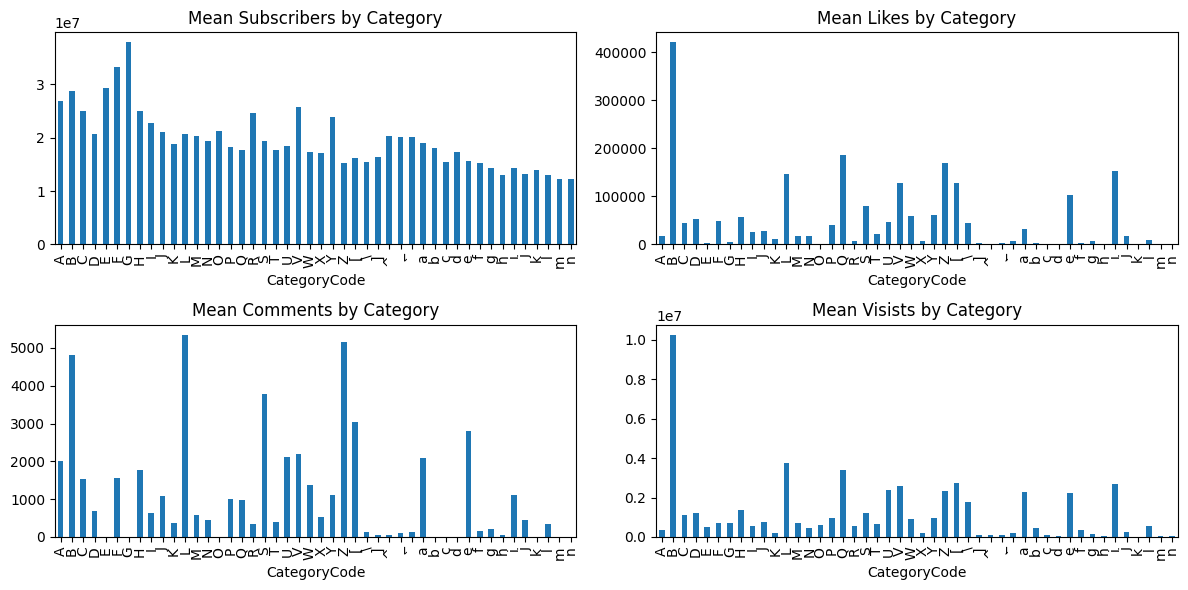

In [24]:
# Create bar plots for mean values within each category
plt.figure(figsize=(12, 6))
plt.subplot(221)
mean_subscribers.plot(kind='bar')
plt.title('Mean Subscribers by Category')
plt.xticks(rotation=90)
plt.subplot(222)
mean_likes.plot(kind='bar')
plt.title('Mean Likes by Category')
plt.xticks(rotation=90)
plt.subplot(223)
mean_comments.plot(kind='bar')
plt.title('Mean Comments by Category')
plt.xticks(rotation=90)
plt.subplot(224)
mean_visits.plot(kind='bar')
plt.title('Mean Visists by Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Geographical Analysis

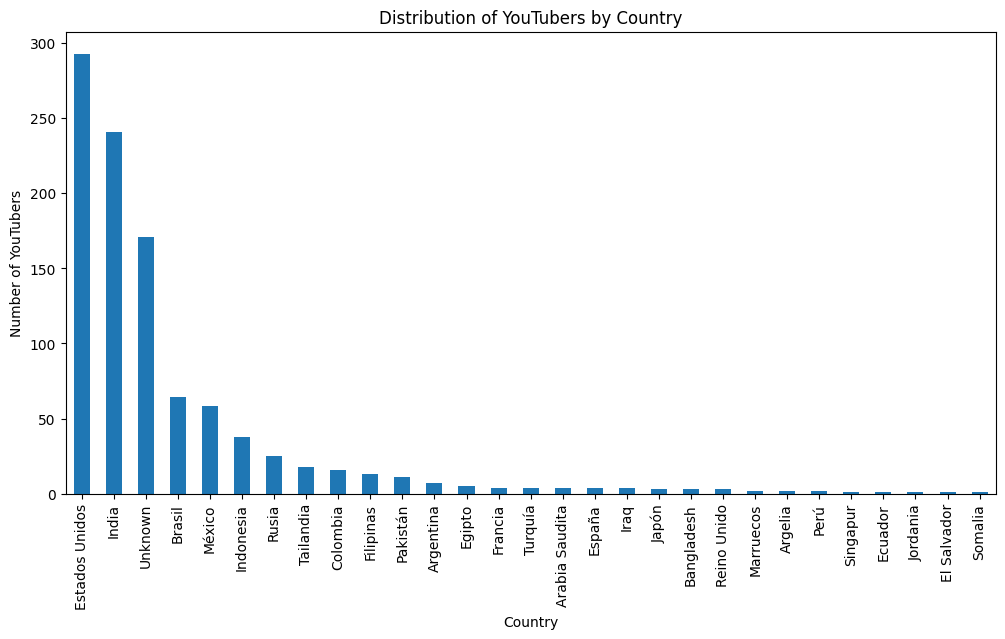

In [25]:
# Create a bar plot to show the distribution of YouTubers by country
plt.figure(figsize=(12, 6))
df['Country'].value_counts().astype(int).plot(kind='bar')
plt.title('Distribution of YouTubers by Country')
plt.xlabel('Country')
plt.ylabel('Number of YouTubers')
plt.xticks(rotation=90)
plt.show()

In [26]:
# Group the data by country
grouped_by_country = df.groupby('Country')

# Calculate mean values for Subscribers, Likes, and Comments for each country
mean_subscribers_by_country = grouped_by_country['Subscribers'].mean().astype(int)
mean_likes_by_country = grouped_by_country['Likes'].mean().astype(int)
mean_comments_by_country = grouped_by_country['Comments'].mean().astype(int)

# Print the mean values for each country
print("Mean Subscribers by Country:")
print(mean_subscribers_by_country)

print("\nMean Likes by Country:")
print(mean_likes_by_country)

print("\nMean Comments by Country:")
mean_comments_by_country

Mean Subscribers by Country:
Country
Arabia Saudita    18650000
Argelia           15750000
Argentina         17728571
Bangladesh        18400000
Brasil            19482812
Colombia          20962500
Ecuador           26800000
Egipto            13980000
El Salvador       21900000
España            16150000
Estados Unidos    21387713
Filipinas         20076923
Francia           21475000
India             24164730
Indonesia         19802631
Iraq              19675000
Japón             18000000
Jordania          14200000
Marruecos         12900000
México            19860344
Pakistán          21072727
Perú              15700000
Reino Unido       17733333
Rusia             17056000
Singapur          12400000
Somalia           11700000
Tailandia         20011111
Turquía           18050000
Unknown           24151461
Name: Subscribers, dtype: int32

Mean Likes by Country:
Country
Arabia Saudita     29025
Argelia            14400
Argentina         132979
Bangladesh           349
Brasil          

Country
Arabia Saudita    1439
Argelia            712
Argentina         1066
Bangladesh          21
Brasil            2870
Colombia           371
Ecuador             17
Egipto              23
El Salvador       2100
España             186
Estados Unidos    2098
Filipinas         1022
Francia             60
India             1009
Indonesia          581
Iraq              5139
Japón              805
Jordania             0
Marruecos            9
México            1206
Pakistán            29
Perú              1683
Reino Unido       2744
Rusia             3004
Singapur            26
Somalia           2900
Tailandia          119
Turquía            297
Unknown              8
Name: Comments, dtype: int32

In [27]:
import geopandas as gpd

# Calculate YouTuber count by country
youtuber_count_by_country = df['Country'].value_counts().reset_index()
youtuber_count_by_country.columns = ['Country', 'YouTuberCount']

C:\Users\Asad Ameen\AppData\Local\Temp\ipykernel_13244\1310272362.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


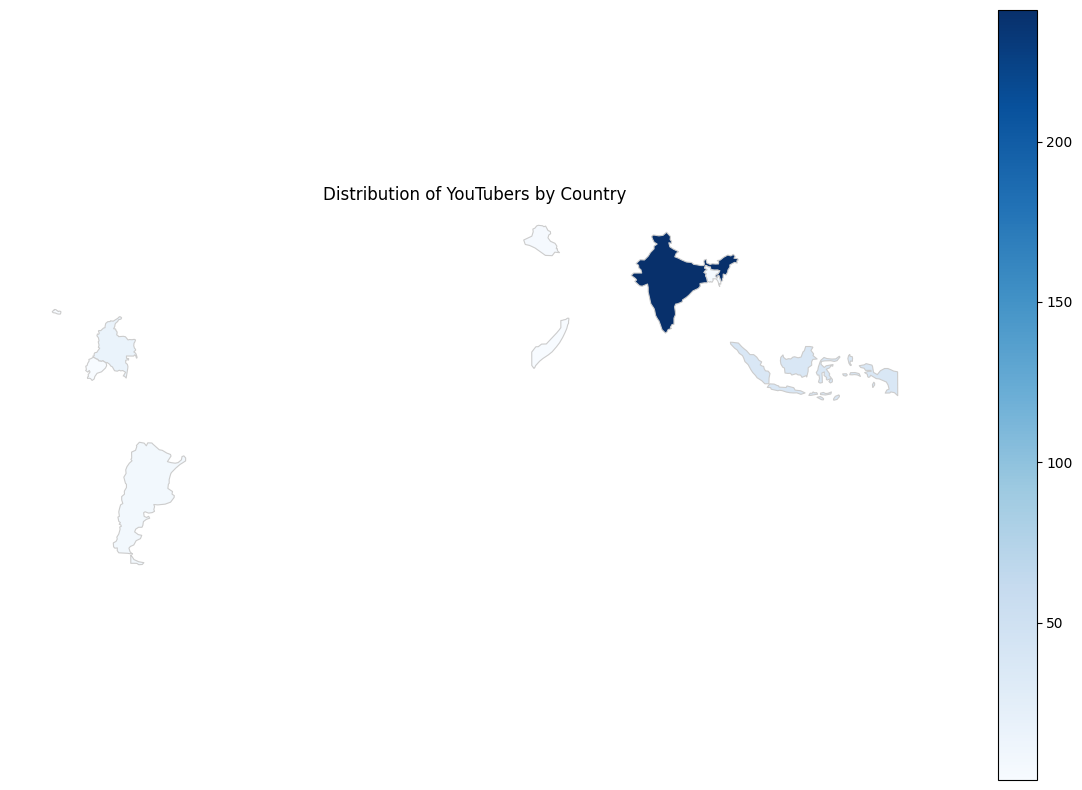

In [28]:
# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the YouTuber count data with the world map data based on country names
merged_data = world.set_index('name').join(youtuber_count_by_country.set_index('Country'))

# Plot the map with color-coded countries
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.axis('off')

# Plot the map with color-coded countries
merged_data.plot(column='YouTuberCount', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Distribution of YouTubers by Country')
plt.show()

In [29]:
# Find the unique countries in the "Country" column
unique_countries = df['Country'].unique()

# Print the list of unique countries
print("Unique Countries:")
for country in unique_countries:
    print(country)

Unique Countries:
India
Estados Unidos
Unknown
Brasil
México
Rusia
Pakistán
Filipinas
Indonesia
Tailandia
Francia
Colombia
Iraq
Japón
Ecuador
Argentina
Turquía
Arabia Saudita
El Salvador
Bangladesh
Reino Unido
Argelia
España
Perú
Egipto
Jordania
Marruecos
Singapur
Somalia


In [30]:
# Define a mapping dictionary for country name corrections
country_corrections = {
    'India': 'India',
    'Estados Unidos': 'United States of America',
    'Unknown': 'Unknown',
    'Brasil': 'Brazil',
    'México': 'Mexico',
    'Rusia': 'Russia',
    'Pakistán': 'Pakistan',
    'Filipinas': 'Philippines',
    'Indonesia': 'Indonesia',
    'Tailandia': 'Thailand',
    'Francia': 'France',
    'Colombia': 'Colombia',
    'Iraq': 'Iraq',
    'Japón': 'Japan',
    'Ecuador': 'Ecuador',
    'Argentina': 'Argentina',
    'Turquía': 'Turkey',
    'Arabia Saudita': 'Saudi Arabia',
    'El Salvador': 'El Salvador',
    'Bangladesh': 'Bangladesh',
    'Reino Unido': 'United Kingdom',
    'Argelia': 'Algeria',
    'España': 'Spain',
    'Perú': 'Peru',
    'Egipto': 'Egypt',
    'Jordania': 'Jordan',
    'Marruecos': 'Morocco',
    'Singapur': 'Singapore',
    'Somalia': 'Somalia'
}

# Apply the corrections to the "Country" column
df['Country'] = df['Country'].replace(country_corrections)

# Print the first few rows of the DataFrame to verify the corrections
df.head(20)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,EngagementRate,CategoryCode
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,0.000011,A
1,2,MrBeast,"Videojuegos, Humor",183500000,United States of America,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,0.028883,B
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,0.000149,C
3,4,SETIndia,Not Specified,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,0.000001,D
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,0.000109,E
5,6,PewDiePie,"Películas, Videojuegos",111500000,United States of America,2400000.0,197300,4900,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...,0.001770,F
6,7,LikeNastyaofficial,Juguetes,107500000,Unknown,2600000.0,28000,0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...,0.000260,G
7,8,VladandNiki,"Animación, Juguetes",101400000,Unknown,4100000.0,22100,0,http://youtube.com/channel/UCvlE5gTbOvjiolFlEm...,0.000218,E
8,9,zeemusiccompany,Música y baile,99700000,India,74300.0,2600,32,http://youtube.com/channel/UCFFbwnve3yF62-tVXk...,0.000026,A
9,10,WWE,Videojuegos,97200000,United States of America,184500.0,6300,214,http://youtube.com/channel/UCJ5v_MCY6GNUBTO8-D...,0.000065,H


In [31]:
df

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,EngagementRate,CategoryCode
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,0.000011,A
1,2,MrBeast,"Videojuegos, Humor",183500000,United States of America,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,0.028883,B
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,0.000149,C
3,4,SETIndia,Not Specified,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,0.000001,D
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,0.000109,E
...,...,...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Not Specified,11700000,United States of America,397400.0,14000,124,http://youtube.com/channel/UCPKNKldggioffXPkSm...,0.001197,D
996,997,Adaahqueen,Not Specified,11700000,India,1100000.0,92500,164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...,0.007906,D
997,998,LittleAngelIndonesia,Música y baile,11700000,Unknown,211400.0,745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...,0.000064,A
998,999,PenMultiplex,Not Specified,11700000,India,14000.0,81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...,0.000007,D


In [32]:
# Calculate YouTuber count by country
youtuber_count_by_country = df['Country'].value_counts().reset_index()
youtuber_count_by_country.columns = ['Country', 'YouTuberCount']

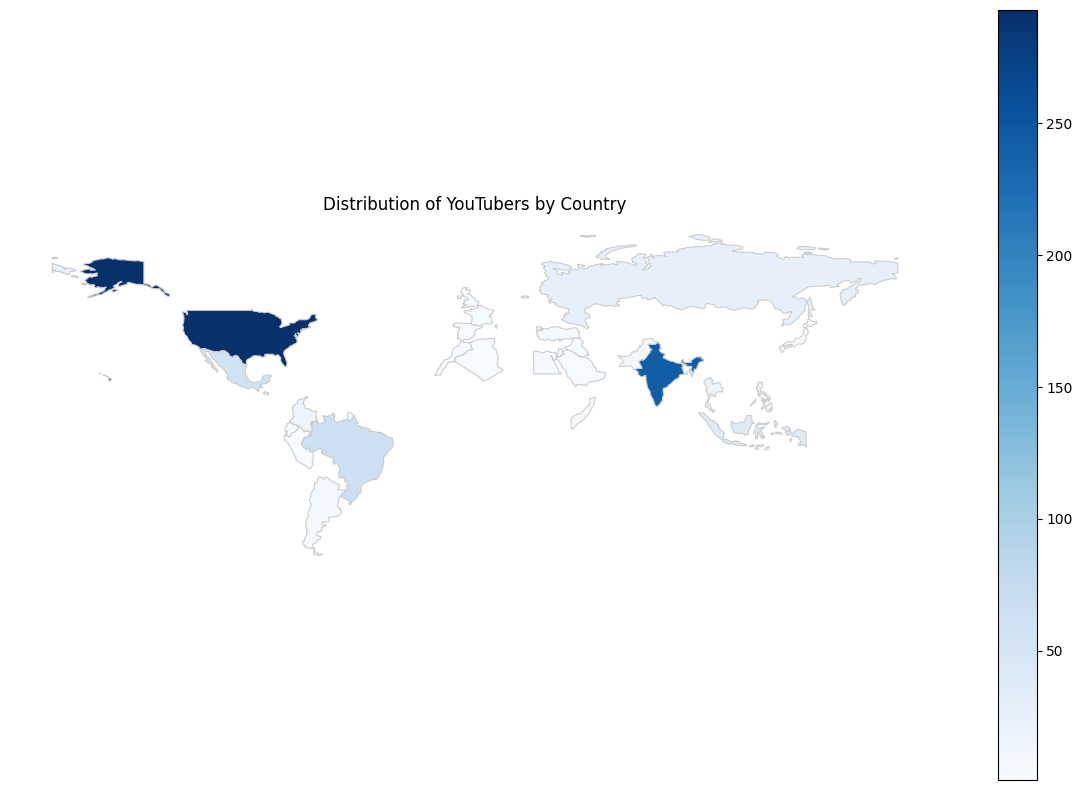

In [33]:
# # Load world map data
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the YouTuber count data with the world map data based on country names
merged_data = world.set_index('name').join(youtuber_count_by_country.set_index('Country'))

# Plot the map with color-coded countries
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.axis('off')

# Plot the map with color-coded countries
merged_data.plot(column='YouTuberCount', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Distribution of YouTubers by Country')
plt.show()

In [34]:
df

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,EngagementRate,CategoryCode
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,0.000011,A
1,2,MrBeast,"Videojuegos, Humor",183500000,United States of America,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,0.028883,B
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,0.000149,C
3,4,SETIndia,Not Specified,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,0.000001,D
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,0.000109,E
...,...,...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,Not Specified,11700000,United States of America,397400.0,14000,124,http://youtube.com/channel/UCPKNKldggioffXPkSm...,0.001197,D
996,997,Adaahqueen,Not Specified,11700000,India,1100000.0,92500,164,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...,0.007906,D
997,998,LittleAngelIndonesia,Música y baile,11700000,Unknown,211400.0,745,0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...,0.000064,A
998,999,PenMultiplex,Not Specified,11700000,India,14000.0,81,1,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...,0.000007,D


In [35]:
youtuber_count_by_country

,Country,YouTuberCount
0,United States of America,293
1,India,241
2,Unknown,171
3,Brazil,64
4,Mexico,58
5,Indonesia,38
6,Russia,25
7,Thailand,18
8,Colombia,16
9,Philippines,13


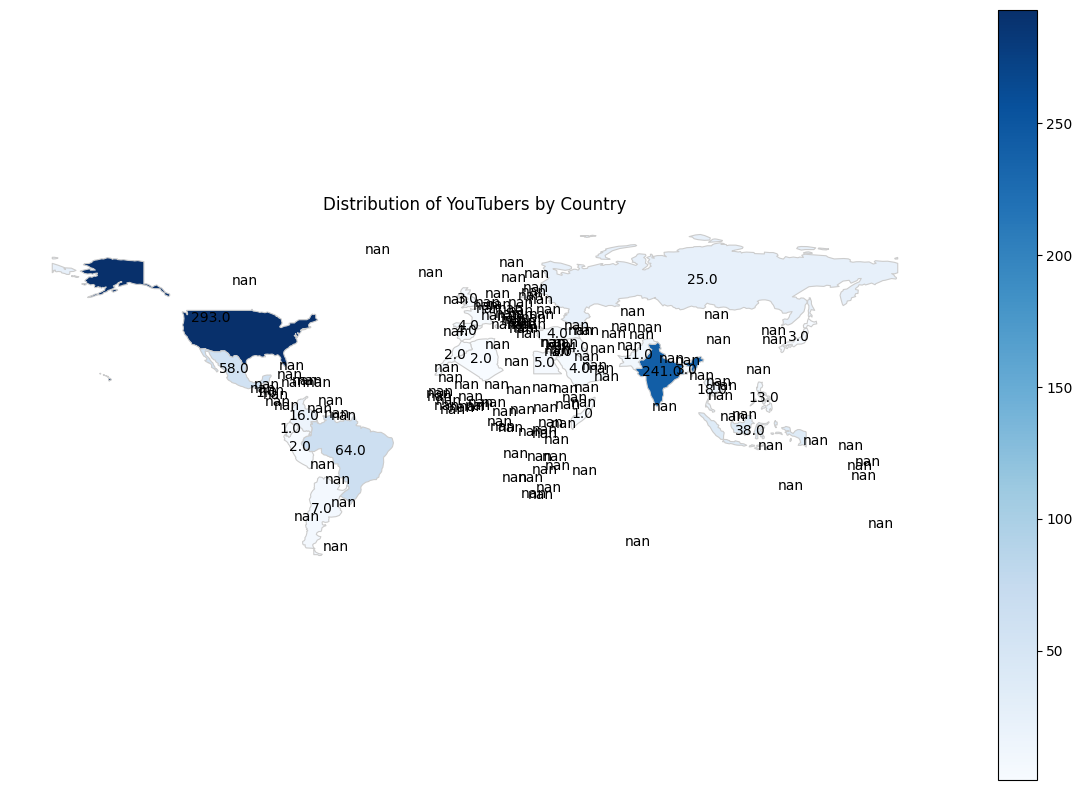

In [36]:
# Merge the YouTuber count data with the world map data based on country names
merged_data = world.set_index('name').join(youtuber_count_by_country.set_index('Country'))

# Plot the map with color-coded countries
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.axis('off')

# Plot the map with color-coded countries
merged_data.plot(column='YouTuberCount', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add country labels to the map
for idx, row in merged_data.iterrows():
    ax.annotate(text=row['YouTuberCount'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), fontsize=10, ha='center', va='center')

plt.title('Distribution of YouTubers by Country')
plt.show()

In [37]:
# Correct the name of the United States in the "Country" column
df['Country'] = df['Country'].replace({'United States': 'United States of America'})

# Print the first few rows of the DataFrame to verify the correction
df.head()

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,EngagementRate,CategoryCode
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,0.000011,A
1,2,MrBeast,"Videojuegos, Humor",183500000,United States of America,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,0.028883,B
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,0.000149,C
3,4,SETIndia,Not Specified,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,0.000001,D
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,0.000109,E


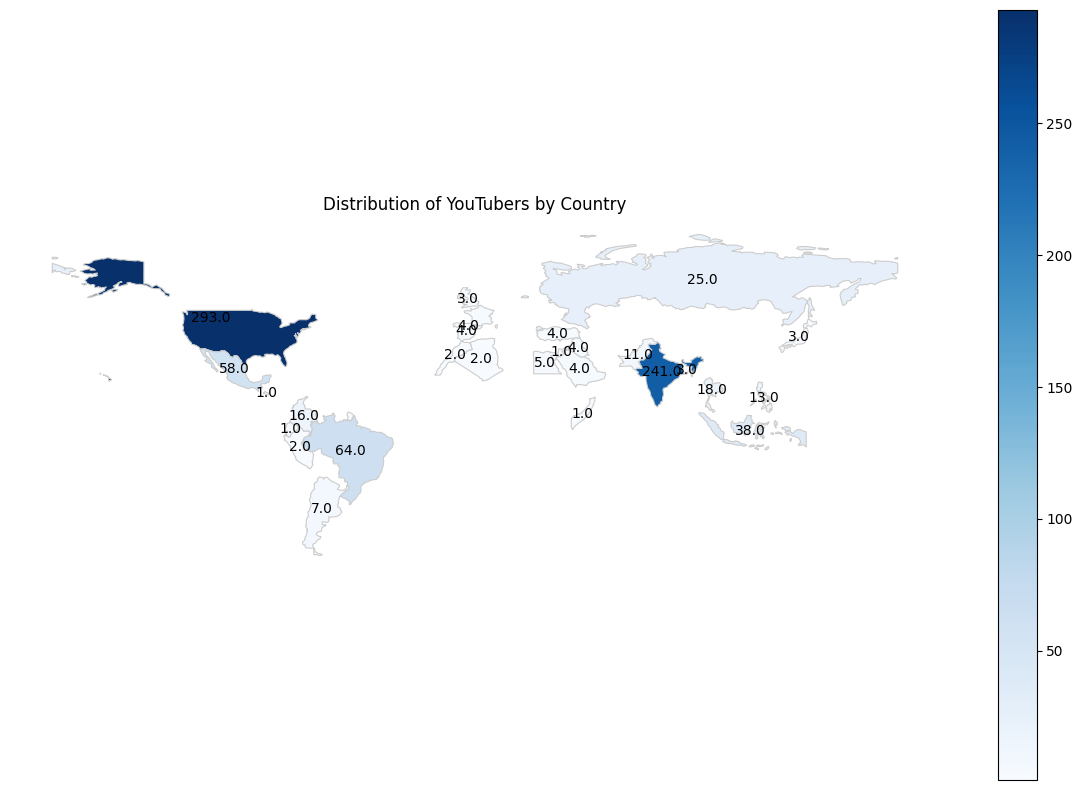

In [38]:
# Plot the map with color-coded countries
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.axis('off')

# Plot the map with color-coded countries
merged_data.plot(column='YouTuberCount', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add country labels to the map without displaying NaN
for idx, row in merged_data.iterrows():
    label = str(row['YouTuberCount']) if not pd.isna(row['YouTuberCount']) else ''  # Replace NaN with an empty string
    ax.annotate(text=label, xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), fontsize=10, ha='center', va='center')

plt.title('Distribution of YouTubers by Country')
plt.show()

# Rank Analysis

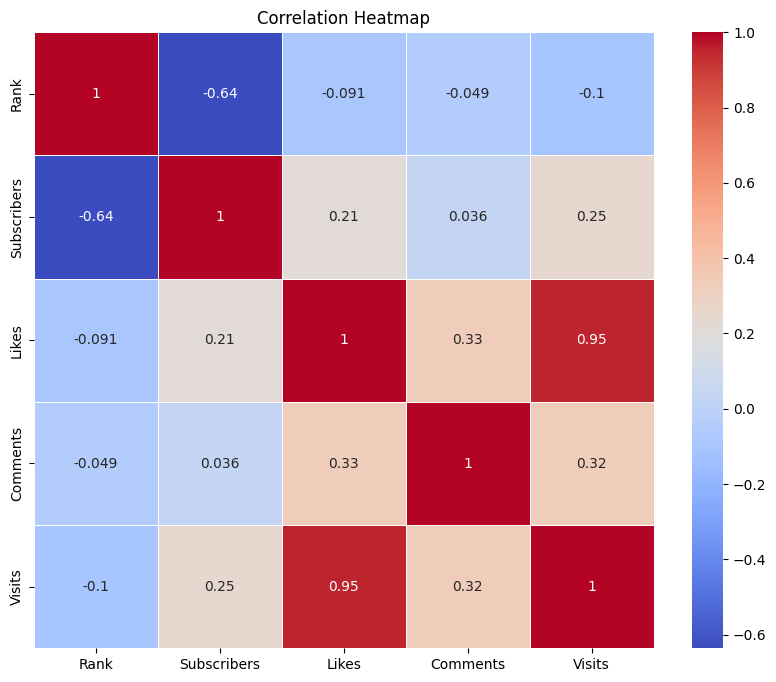

In [39]:
# Calculate the correlation matrix
correlation_matrix = df[['Rank', 'Subscribers', 'Likes', 'Comments', 'Visits']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [40]:
df1.head(100)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,EngagementRate,CategoryCode
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,0.000011,A
1,2,MrBeast,"Videojuegos, Humor",183500000,United States of America,117400000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,0.028883,B
2,3,CoComelon,Educación,165500000,Unknown,7000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,0.000149,C
3,4,SETIndia,Not Specified,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,0.000001,D
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,3900000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,0.000109,E
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Ozuna,Música y baile,36300000,United States of America,22700.0,2400,76,http://youtube.com/channel/UCjIA3wwhi0QjSOXAZw...,0.000066,A
96,97,TotalGaming093,"Películas, Videojuegos",36300000,India,1500000.0,129400,4900,http://youtube.com/channel/UC5c9VlYTSvBSCaoMu_...,0.003565,F
97,98,GenevievesPlayhouse,Juguetes,35700000,Unknown,965500.0,824,0,http://youtube.com/channel/UCK5Q72Uyo73uRPk8Pm...,0.000023,G
98,99,TechnoGamerzOfficial,Not Specified,35600000,India,6200000.0,341800,16500,http://youtube.com/channel/UCX8pnu3DYUnx8qy8V_...,0.009601,D


# Predictive Modeling

In [41]:
df1 = df
df3 = df1
import pandas as pd

# Check for negative values in the 'Visits' column
negative_visits = df3[df3['Visits'] < 0]

# Count the number of negative values
count_negative_visits = len(negative_visits)

# Print the result
if count_negative_visits > 0:
    print(f"There are {count_negative_visits} negative values in the 'Visits' column.")
    print("Negative Visits:")
    print(negative_visits)
else:
    print("There are no negative values in the 'Visits' column.")

There are no negative values in the 'Visits' column.


C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: supplied range of [-inf, 18.58109746535827] is not finite

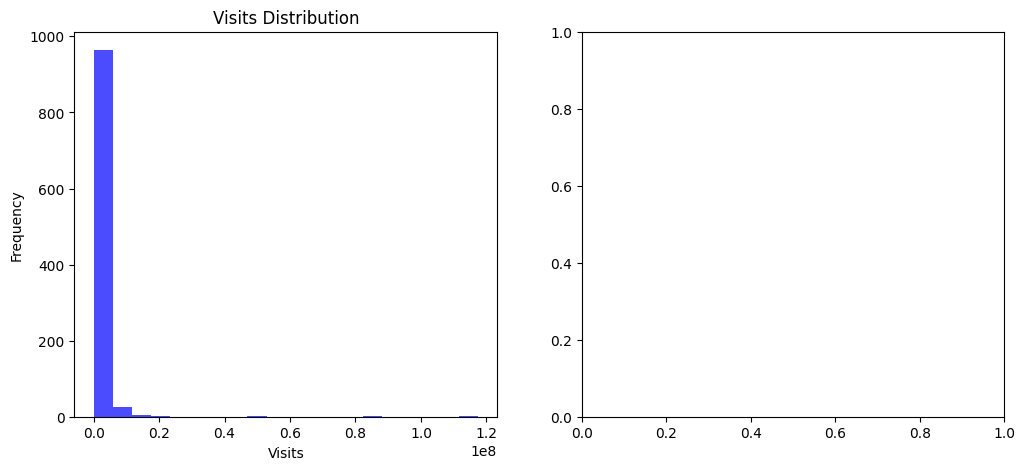

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract the 'Visits' data
visits = df3['Visits']

# Create a new column with the logarithmic values of 'Visits'
df3['Log_Visits'] = np.log(visits)

# Plot the 'Visits' and 'Log_Visits' side by side
plt.figure(figsize=(12, 5))

# Plot 'Visits' on the left
plt.subplot(1, 2, 1)
plt.hist(visits, bins=20, color='blue', alpha=0.7)
plt.title('Visits Distribution')
plt.xlabel('Visits')
plt.ylabel('Frequency')

# Plot 'Log_Visits' on the right
plt.subplot(1, 2, 2)
plt.hist(df3['Log_Visits'], bins=20, color='green', alpha=0.7)
plt.title('Logarithmic Visits Distribution')
plt.xlabel('Log(Visits)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

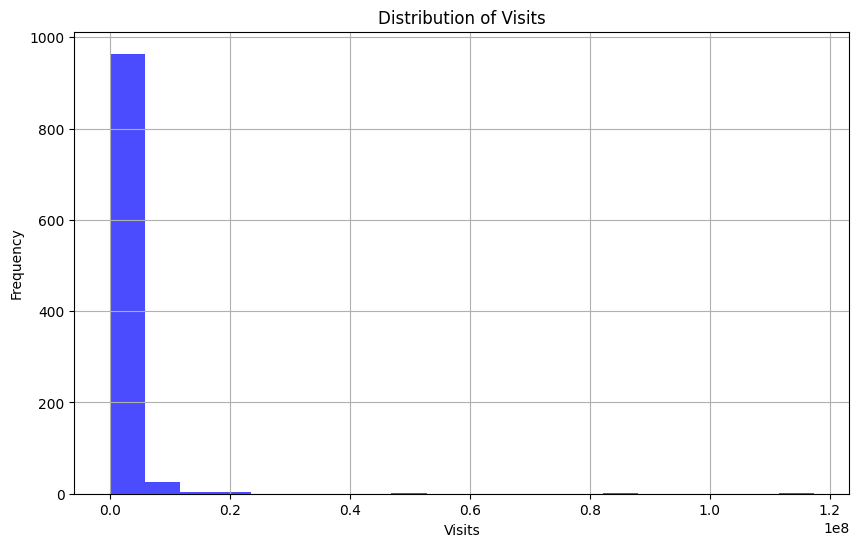

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a histogram to visualize the distribution of 'Visits'
plt.figure(figsize=(10, 6))
plt.hist(df3['Visits'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Visits')
plt.xlabel('Visits')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [45]:
import pandas as pd
import numpy as np


# Define the lower and upper bounds for clipping
lower_bound = 0  # Adjust this as needed
upper_bound = 2000000  # Adjust this as needed
df2 = df
df4 = df3
df5 = df3
df6 = df3
df7 = df2
# Clip the 'Visits' column to the specified range
df4['Visits'] = np.clip(df4['Visits'], lower_bound, upper_bound)

# Display the modified DataFrame
df7.head(100)

,Rank,Username,Categories,Subscribers,Country,Visits,Likes,Comments,Links,EngagementRate,CategoryCode,Log_Visits
0,1,tseries,Música y baile,249500000,India,86200.0,2700,78,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...,0.000011,A,11.364425
1,2,MrBeast,"Videojuegos, Humor",183500000,United States of America,2000000.0,5300000,18500,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...,0.028883,B,18.581097
2,3,CoComelon,Educación,165500000,Unknown,2000000.0,24700,0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...,0.000149,C,15.761421
3,4,SETIndia,Not Specified,162600000,India,15600.0,166,9,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...,0.000001,D,9.655026
4,5,KidsDianaShow,"Animación, Juguetes",113500000,Unknown,2000000.0,12400,0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...,0.000109,E,15.176487
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Ozuna,Música y baile,36300000,United States of America,22700.0,2400,76,http://youtube.com/channel/UCjIA3wwhi0QjSOXAZw...,0.000066,A,10.030120
96,97,TotalGaming093,"Películas, Videojuegos",36300000,India,1500000.0,129400,4900,http://youtube.com/channel/UC5c9VlYTSvBSCaoMu_...,0.003565,F,14.220976
97,98,GenevievesPlayhouse,Juguetes,35700000,Unknown,965500.0,824,0,http://youtube.com/channel/UCK5Q72Uyo73uRPk8Pm...,0.000023,G,13.780401
98,99,TechnoGamerzOfficial,Not Specified,35600000,India,2000000.0,341800,16500,http://youtube.com/channel/UCX8pnu3DYUnx8qy8V_...,0.009601,D,15.640060


In [46]:
# Define the threshold value
threshold_Visits = 1999999
threshold_Likes = 100000
# Filter the DataFrame to keep only rows where 'Likes' <= threshold_likes and Visits <= threshold_visits
df7 = df7[df7['Visits'] <= threshold_Visits]
df7 = df7[df7['Likes'] <= threshold_Likes]

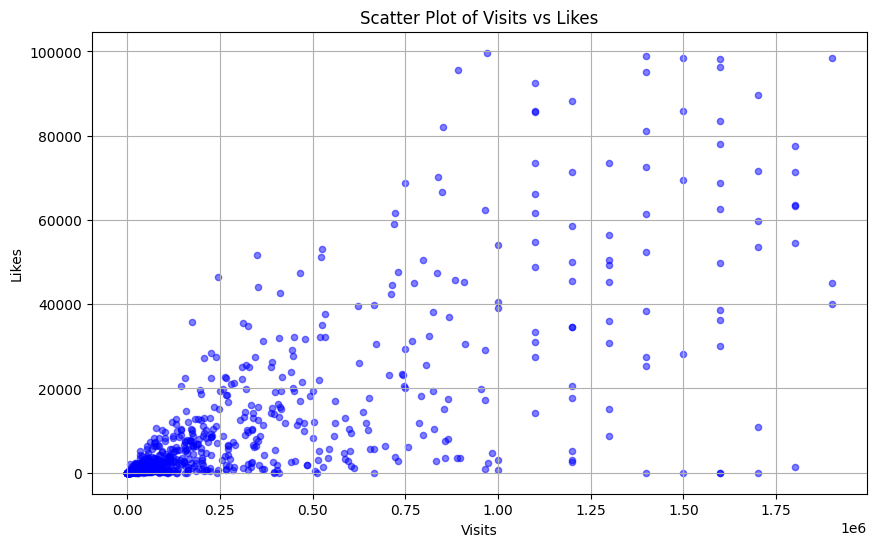

In [47]:
# Extract 'Visits' and 'Likes' data
visits = df7['Visits']
likes = df7['Likes']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(visits, likes, color='blue', alpha=0.5, s=20)
plt.title('Scatter Plot of Visits vs Likes')
plt.xlabel('Visits')
plt.ylabel('Likes')
plt.grid(True)
plt.show()

In [48]:
column_name = 'Visits'

# Check if there are any NaN values in the specified column
has_nan_values = df7[column_name].isna().any()

if has_nan_values:
    print(f"The column '{column_name}' has NaN values.")
else:
    print(f"The column '{column_name}' does not have NaN values.")

The column 'Visits' does not have NaN values.


Epoch 200, RMSE: 13705.628860323635


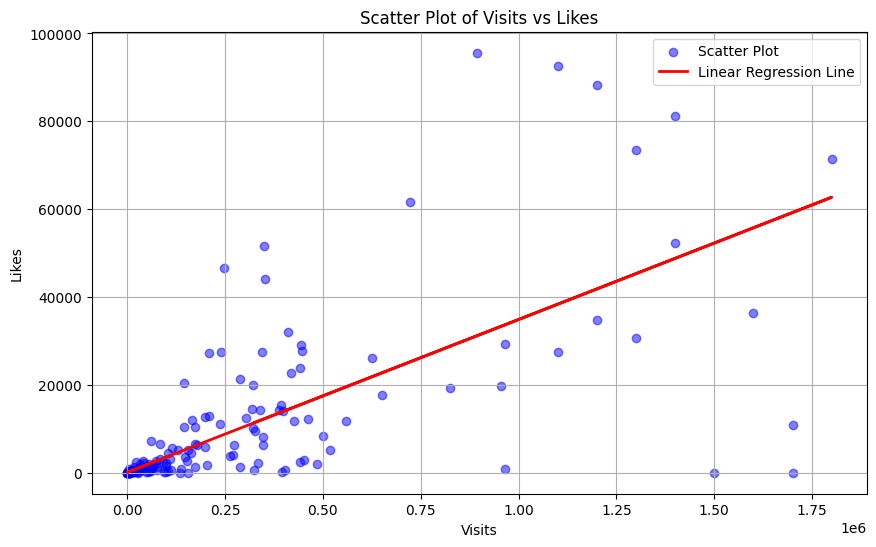

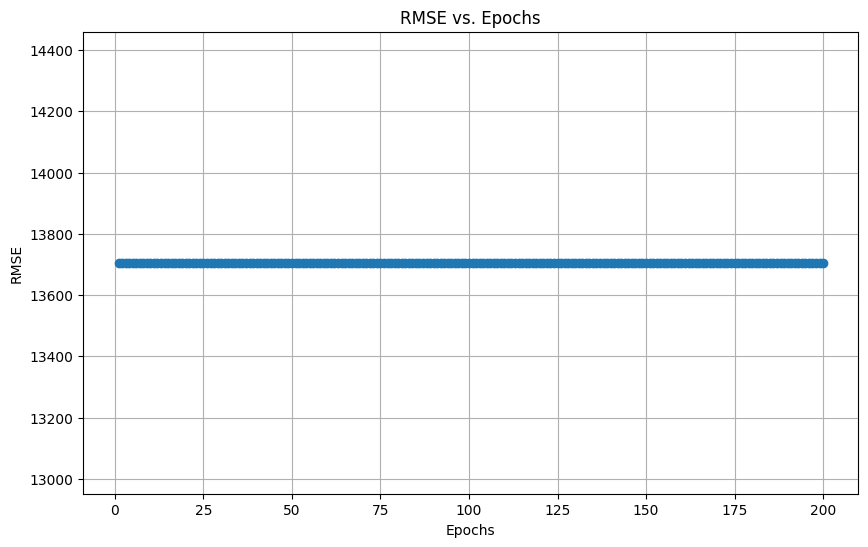

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Assuming you have a DataFrame 'df' with 'Visits' and 'Likes' columns
# Extract 'Visits' and 'Likes' data
X = df7[['Visits']]
y = df7['Likes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Lists to store RMSE values and epochs
rmse_values = []
epochs = []

# Training loop
for epoch in range(1, 201):  # Adjust the number of epochs as needed
    # Fit the model to the training data
    model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    
    # Calculate RMSE and append to the list
    rmse = sqrt(mean_squared_error(y_test, y_pred))
    rmse_values.append(rmse)
    epochs.append(epoch)

# Print RMSE at each epoch (optional)
print(f'Epoch {epoch}, RMSE: {rmse}')

# Create a scatter plot of Visits vs Likes (in blue)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Scatter Plot')
plt.title('Scatter Plot of Visits vs Likes')
plt.xlabel('Visits')
plt.ylabel('Likes')

# Plot the linear regression line (in red)
plt.plot(X_test, model.predict(X_test), color='red', linewidth=2, label='Linear Regression Line')

# Set labels and legend
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Plot RMSE against epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, rmse_values, marker='o', linestyle='-')
plt.title('RMSE vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

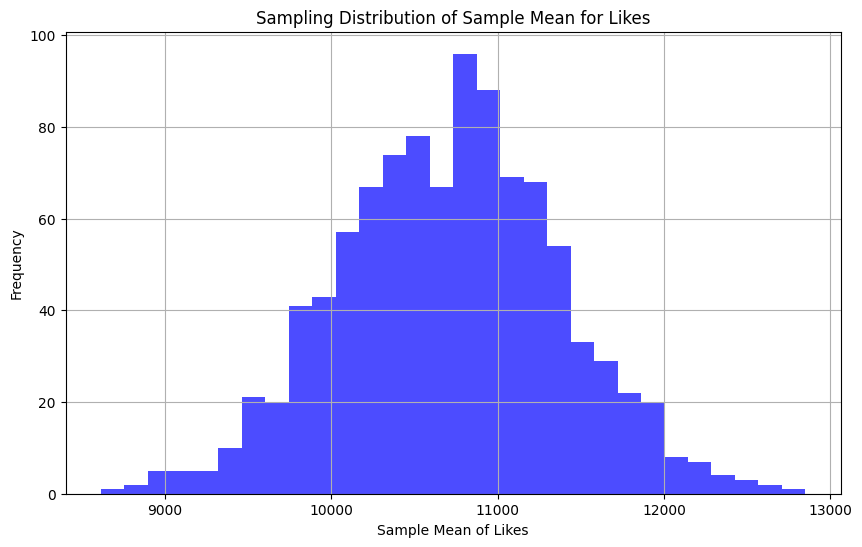

In [54]:
# Extract the 'Likes' column as a NumPy array
likes = df7['Likes'].values

# Number of bootstraps and sample size
num_bootstraps = 1000 
sample_size = len(likes)

# Initialize an array to store the sample means
sample_means = np.zeros(num_bootstraps)

# Perform bootstrapping
for i in range(num_bootstraps):
    # Randomly sample with replacement
    bootstrap_sample = np.random.choice(likes, size=sample_size, replace=True)
    # Calculate the mean of the bootstrap sample
    sample_means[i] = np.mean(bootstrap_sample)

# Plot the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, color='blue', alpha=0.7)
plt.xlabel('Sample Mean of Likes')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of Sample Mean for Likes')
plt.grid(True)
plt.show()

In [56]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df7[['Visits', 'Comments']]
y = df7['Likes']

In [74]:
def build_neural_network(input_shape):
    """
    Build a neural network model for regression.

    Args:
        input_shape (tuple): Input shape for the model.

    Returns:
        tf.keras.models.Sequential: Uncompiled neural network model.
    """
    model = keras.Sequential([
        keras.layers.Dense(64, activation='relu', input_shape=input_shape),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(1)  # Output layer with 1 neuron for regression
    ])
    return model

def train_neural_network(model, X_train, y_train, num_epochs=100, batch_size=32, validation_split=0.2, verbose=1):
    """
    Train a neural network model for regression.

    Args:
        model (tf.keras.models.Sequential): Compiled neural network model.
        X_train (numpy.ndarray): Training features (input variables).
        y_train (numpy.ndarray): Training target variable (label).
        num_epochs (int): Number of training epochs.
        batch_size (int): Batch size for training.
        validation_split (float): Fraction of data to use for validation.
        verbose (int): Verbosity mode (0, 1, or 2).

    Returns:
        int: Number of training epochs.
        float: Mean Squared Error (MSE) on the validation set.
        dict: Training history containing loss and validation loss.
    """
    # Split the data into training and validation sets
    num_samples = len(X_train)
    num_val_samples = int(num_samples * validation_split)
    X_val = X_train[-num_val_samples:]
    y_val = y_train[-num_val_samples:]
    X_train = X_train[:-num_val_samples]
    y_train = y_train[:-num_val_samples]

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        verbose=verbose
    )

    # Evaluate the model on the validation set
    val_loss = history.history['val_loss'][-1]

    return num_epochs, val_loss, history.history

In [75]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """
    Plot training and validation loss over epochs.

    Args:
        history (dict): Training history containing loss and validation loss.

    Returns:
        None
    """
    # Extract training and validation loss from the history
    training_loss = history['loss']
    validation_loss = history['val_loss']
    
    # Get the number of epochs
    num_epochs = len(training_loss)

    # Create a range of epochs for the X-axis
    epochs = range(1, num_epochs + 1)

    # Plot training and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, training_loss, 'b', label='Training Loss')
    plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()


Epoch 1/200


C:\Users\Asad Ameen\AppData\Local\Temp\ipykernel_13244\3993574071.py:40: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_val = y_train[-num_val_samples:]
C:\Users\Asad Ameen\AppData\Local\Temp\ipykernel_13244\3993574071.py:42: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y_train[:-num_val_samples]


17/17 [==============================] - 1s 11ms/step - loss: 493404416.0000 - mae: 10828.9189 - val_loss: 511939840.0000 - val_mae: 11040.3018
Epoch 2/200
17/17 [==============================] - 0s 4ms/step - loss: 493369760.0000 - mae: 10828.2607 - val_loss: 511888320.0000 - val_mae: 11039.4346
Epoch 3/200
17/17 [==============================] - 0s 5ms/step - loss: 493313920.0000 - mae: 10827.1680 - val_loss: 511791328.0000 - val_mae: 11037.8018
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 493209152.0000 - mae: 10825.1475 - val_loss: 511619712.0000 - val_mae: 11034.9023
Epoch 5/200
17/17 [==============================] - 0s 5ms/step - loss: 493038144.0000 - mae: 10821.6709 - val_loss: 511329184.0000 - val_mae: 11030.0439
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 492759968.0000 - mae: 10816.2461 - val_loss: 510884864.0000 - val_mae: 11022.7549
Epoch 7/200
17/17 [==============================] - 0s 4ms/step - loss: 49233030

17/17 [==============================] - 0s 4ms/step - loss: 132799472.0000 - mae: 6227.8276 - val_loss: 107028368.0000 - val_mae: 5687.8721
Epoch 55/200
17/17 [==============================] - 0s 4ms/step - loss: 130788800.0000 - mae: 6202.2881 - val_loss: 106367760.0000 - val_mae: 5687.0366
Epoch 56/200
17/17 [==============================] - 0s 4ms/step - loss: 129120288.0000 - mae: 6191.6641 - val_loss: 106059824.0000 - val_mae: 5696.5132
Epoch 57/200
17/17 [==============================] - 0s 4ms/step - loss: 127584512.0000 - mae: 6174.5391 - val_loss: 105985528.0000 - val_mae: 5708.7876
Epoch 58/200
17/17 [==============================] - 0s 4ms/step - loss: 126509600.0000 - mae: 6162.8203 - val_loss: 106065088.0000 - val_mae: 5726.3027
Epoch 59/200
17/17 [==============================] - 0s 4ms/step - loss: 125532160.0000 - mae: 6149.4209 - val_loss: 106262016.0000 - val_mae: 5737.9976
Epoch 60/200
17/17 [==============================] - 0s 4ms/step - loss: 124903728.0000 

17/17 [==============================] - 0s 4ms/step - loss: 120482952.0000 - mae: 5842.0312 - val_loss: 112360968.0000 - val_mae: 5634.0327
Epoch 108/200
17/17 [==============================] - 0s 4ms/step - loss: 120450768.0000 - mae: 5833.3428 - val_loss: 112266960.0000 - val_mae: 5629.6929
Epoch 109/200
17/17 [==============================] - 0s 4ms/step - loss: 120346624.0000 - mae: 5831.8550 - val_loss: 112645128.0000 - val_mae: 5638.7700
Epoch 110/200
17/17 [==============================] - 0s 4ms/step - loss: 120452336.0000 - mae: 5839.2305 - val_loss: 113108376.0000 - val_mae: 5651.6533
Epoch 111/200
17/17 [==============================] - 0s 4ms/step - loss: 120304528.0000 - mae: 5833.3765 - val_loss: 112847528.0000 - val_mae: 5641.8115
Epoch 112/200
17/17 [==============================] - 0s 4ms/step - loss: 120426480.0000 - mae: 5828.1763 - val_loss: 112394880.0000 - val_mae: 5626.9507
Epoch 113/200
17/17 [==============================] - 0s 4ms/step - loss: 120324264

Epoch 160/200
17/17 [==============================] - 0s 4ms/step - loss: 119736280.0000 - mae: 5745.9399 - val_loss: 113716344.0000 - val_mae: 5604.3027
Epoch 161/200
17/17 [==============================] - 0s 4ms/step - loss: 119753040.0000 - mae: 5743.5054 - val_loss: 113626840.0000 - val_mae: 5600.0000
Epoch 162/200
17/17 [==============================] - 0s 4ms/step - loss: 119700544.0000 - mae: 5742.1475 - val_loss: 113538328.0000 - val_mae: 5595.5557
Epoch 163/200
17/17 [==============================] - 0s 4ms/step - loss: 119710496.0000 - mae: 5741.8374 - val_loss: 113561192.0000 - val_mae: 5596.8667
Epoch 164/200
17/17 [==============================] - 0s 4ms/step - loss: 119677616.0000 - mae: 5739.1333 - val_loss: 113361416.0000 - val_mae: 5590.1592
Epoch 165/200
17/17 [==============================] - 0s 4ms/step - loss: 119715360.0000 - mae: 5738.2456 - val_loss: 113410640.0000 - val_mae: 5590.9697
Epoch 166/200
17/17 [==============================] - 0s 4ms/step - l

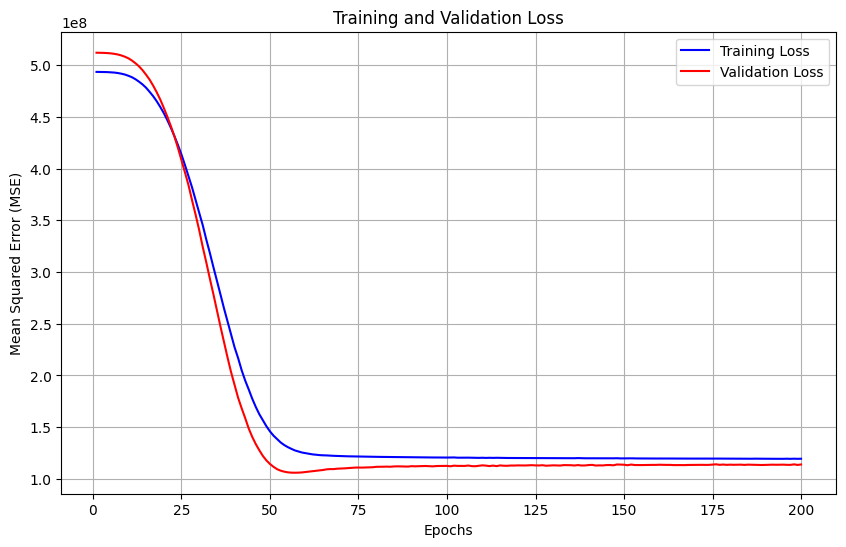

In [76]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Set hyperparameters and data split ratio
num_epochs = 200
batch_size = 32
validation_split = 0.2

# Assuming X and y are your feature and target arrays
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=validation_split, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Build the neural network model
model = build_neural_network(input_shape=(X_train.shape[1],))

# Train the model
num_epochs, val_loss, history = train_neural_network(
    model, X_train_scaled, y_train,
    num_epochs=num_epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    verbose=1  
)

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation Mean Squared Error: {mse}")
print(f"Validation R-squared (R2): {r2}")

# Plot training history
plot_training_history(history)

In [78]:
# Manually input values of Visits and Comments
manual_visits = 86200  
manual_comments = 78   

# Create an array containing the manually input values
X_manual = np.array([[manual_visits, manual_comments]])

# Standardize the manual input data using the same scaler
X_manual_scaled = scaler.transform(X_manual)

# Predict Likes using the trained model
y_pred_manual = model.predict(X_manual_scaled)

# Convert the predicted Likes to an integer
predicted_likes = int(y_pred_manual[0][0])

# The 'y_pred_manual' variable now contains the predicted Likes for the manually input data
print(f"Predicted Likes for Manual Input: {predicted_likes}")

1/1 [==============================] - 0s 23ms/step
Predicted Likes for Manual Input: 2821


C:\Users\Asad Ameen\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
